## Outliers:

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.DataFrame({
    "Study_Hours": [1,2,3,4,5,6,7,8,20]
})

In [4]:
data

,Study_Hours
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,20


In [5]:
data.describe()

,Study_Hours
count,9.000000
mean,6.222222
std,5.651942
min,1.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,20.000000


## IQR Method:

In [7]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3 - Q1

LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

outliers = data[(data < (LB)) |(data > (UB))]

In [8]:
Q1

Study_Hours    3.0
Name: 0.25, dtype: float64

In [9]:
Q3 + 1.5 * IQR

Study_Hours    13.0
dtype: float64

In [10]:
outliers

,Study_Hours
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,20.0


## 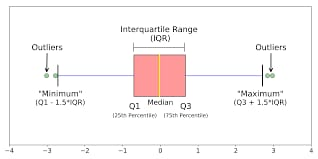

## Z-Score Method:

In [12]:
data = pd.DataFrame({
    "Study_Hours": [ 1,2,3,4,5,6,7,20]
})
data

,Study_Hours
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,20


In [13]:
z_scores = np.abs(stats.zscore(data["Study_Hours"]))
z_scores

array([0.89087081, 0.71269665, 0.53452248, 0.35634832, 0.17817416,
       0.        , 0.17817416, 2.49443826])

In [14]:
outliers = data[z_scores > 2]
outliers

,Study_Hours
7,20


In [17]:
stats.zscore(data["Study_Hours"])

array([-0.89087081, -0.71269665, -0.53452248, -0.35634832, -0.17817416,
        0.        ,  0.17817416,  2.49443826])

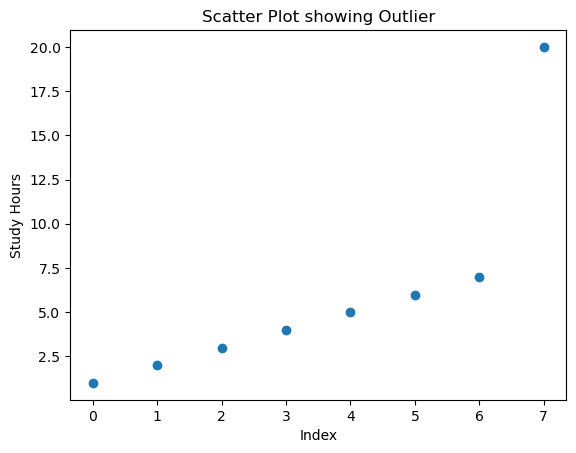

In [19]:
plt.scatter(range(len(data)), data["Study_Hours"])
plt.xlabel("Index")
plt.ylabel("Study Hours")
plt.title("Scatter Plot showing Outlier")
plt.show()

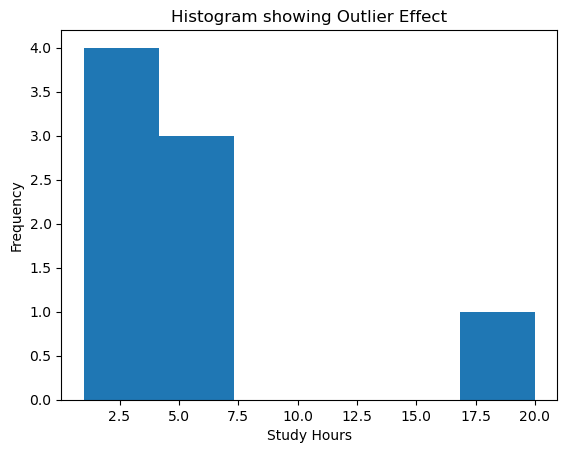

In [21]:
plt.hist(data["Study_Hours"],6)
plt.xlabel("Study Hours")
plt.ylabel("Frequency")
plt.title("Histogram showing Outlier Effect")
plt.show()